# Sign Language Digit Recognition with Deep Learning

Preparing and processing our own custom image data set of sign language digits. Later use these images to train our fine-tuned MobileNet model.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


### Obtaining the Data

Dataset: https://github.com/ardamavi/Sign-Language-Digits-Dataset




- 10 classes (digits 0-9)
- Class data:
  - class 0: 205 images
  - class 1: 206 images
  - class 2: 206 images
  - class 3: 206 images
  - class 4: 207 images
  - class 5: 207 images
  - class 6: 207 images
  - class 7: 206 images
  - class 8: 208 images
  - class 9: 204 images

  - Extract sub-directories labeled 0 through 9 and nest directories directly underneath Sign-Language-Digits-Dataset directory. Directory structure should look like this:

        /Sign-Language-Digits-Dataset/
        。 0/
        。 1/
        。 2/
        ....
        。 9/

### Organizing the Data

In [3]:
# # Organize data into train, valid, test dirs
# os.chdir('/content/drive/MyDrive/Neural Networks/Sign Language Digit Recognition/Sign-Language-Digits-Dataset')
# if os.path.isdir('train/0/') is False:
#     os.mkdir('train')
#     os.mkdir('valid')
#     os.mkdir('test')

#     for i in range(0, 10): # Iterating over all the directories from 0 - 9
#         shutil.move(f'{i}', 'train') # Moving each of these directories into our train directory

#         # making the valid and test directories for each digit
#         os.mkdir(f'valid/{i}')
#         os.mkdir(f'test/{i}')

#         # Randomly chosing 30 samples from the training set and adding them to the validation set, for each digit
#         valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
#         for j in valid_samples:
#             shutil.move(f'train/{i}/{j}', f'valid/{i}')

#         # Randomly chosing 5 samples from the training set and adding them to the test set, for each digit
#         test_samples = random.sample(os.listdir(f'train/{i}'), 5)
#         for k in test_samples:
#             shutil.move(f'train/{i}/{k}', f'test/{i}')
# os.chdir('../..')

### Pre-processing the Data

A preprocessing_function parameter is provided to the ImageDataGenerator.
- It is set to tf.keras.applications.mobilenet.preprocess_input.
- This function performs MobileNet-specific preprocessing on images obtained from flow_from_directory().

In [4]:
train_path = '/content/drive/MyDrive/Neural Networks/Sign Language Digit Recognition/Sign-Language-Digits-Dataset/train'
valid_path = '/content/drive/MyDrive/Neural Networks/Sign Language Digit Recognition/Sign-Language-Digits-Dataset/valid'
test_path = '/content/drive/MyDrive/Neural Networks/Sign Language Digit Recognition/Sign-Language-Digits-Dataset/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


### Building the Model

In [5]:
mobile_model = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
mobile_model.summary()

In [20]:
# Removing the last 5 layers and use the remaining layers to build our model
x = mobile_model.layers[-5].output

In [21]:
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)
output = Dense(units=10, activation='softmax')(x)

In [22]:
model = Model(inputs=mobile_model.input, outputs=output)

In [24]:
for layer in model.layers[:-22]:
    layer.trainable = False

In [ ]:
model.summary()

### Train the Model

In [26]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Run more epochs ~30, for better results
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=10,
            verbose=2
)

Epoch 1/10
172/172 - 370s - loss: 0.5897 - accuracy: 0.8265 - val_loss: 0.2355 - val_accuracy: 0.9400 - 370s/epoch - 2s/step
Epoch 2/10
172/172 - 7s - loss: 0.1118 - accuracy: 0.9825 - val_loss: 0.1372 - val_accuracy: 0.9700 - 7s/epoch - 40ms/step
Epoch 3/10
172/172 - 5s - loss: 0.0567 - accuracy: 0.9936 - val_loss: 0.0869 - val_accuracy: 0.9767 - 5s/epoch - 31ms/step
Epoch 4/10
172/172 - 6s - loss: 0.0331 - accuracy: 0.9977 - val_loss: 0.0708 - val_accuracy: 0.9800 - 6s/epoch - 35ms/step
Epoch 5/10
172/172 - 5s - loss: 0.0230 - accuracy: 0.9971 - val_loss: 0.0535 - val_accuracy: 0.9800 - 5s/epoch - 31ms/step
Epoch 6/10
172/172 - 7s - loss: 0.0234 - accuracy: 0.9947 - val_loss: 0.1273 - val_accuracy: 0.9467 - 7s/epoch - 40ms/step
Epoch 7/10
172/172 - 8s - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9833 - 8s/epoch - 47ms/step
Epoch 8/10
172/172 - 6s - loss: 0.0112 - accuracy: 0.9994 - val_loss: 0.0597 - val_accuracy: 0.9833 - 6s/epoch - 35ms/step
Epoch 9/10
172

### Predicting sign language digits / Testing

In [28]:
test_labels = test_batches.classes

In [29]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [30]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


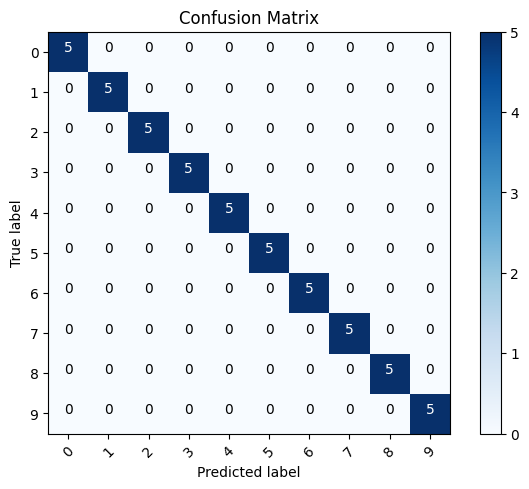

In [33]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')